**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import pickle

import matplotlib.pyplot as plt
import seaborn as sns


**Concatenate Dataset**

In [2]:
import glob
import os  # Import os module to help with path manipulation

# Define the directory with a trailing slash
file_path = "C:/Users/aashi/Downloads/datasets/"  # Make sure to add the trailing slash

# List all CSV files in the directory
all_files = glob.glob(file_path + "*.csv")

# List to hold each DataFrame
dataframes = []

# Loop through each file and process it
for file in all_files:
    # Extract city name from the file name using os.path.basename to get just the filename
    city_name = os.path.basename(file).split('_')[0]  # This extracts the city name correctly
    
    # Read the dataset into a DataFrame with a specified encoding
    df = pd.read_csv(file, encoding='ISO-8859-1')  # Change encoding as needed
    
    # Add the 'City' column with the city name, ensuring it is lowercase
    df['City'] = city_name.capitalize()  # Store city names in lowercase for consistency
    
    # Append the DataFrame to the list
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the result
print(combined_df.head())

# Save the combined dataset to a CSV file
combined_df.to_csv("C:/Users/aashi/Downloads/final_datasets/combined_cars_dataset.csv", index=False)


                                      new_car_detail  \
0  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
1  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
2  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
3  {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...   
4  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...   

                                    new_car_overview  \
0  {'heading': 'Car overview', 'top': [{'key': 'R...   
1  {'heading': 'Car overview', 'top': [{'key': 'R...   
2  {'heading': 'Car overview', 'top': [{'key': 'R...   
3  {'heading': 'Car overview', 'top': [{'key': 'R...   
4  {'heading': 'Car overview', 'top': [{'key': 'R...   

                                     new_car_feature  \
0  {'heading': 'Features', 'top': [{'value': 'Pow...   
1  {'heading': 'Features', 'top': [{'value': 'Pow...   
2  {'heading': 'Features', 'top': [{'value': 'Pow...   
3  {'heading': 'Features', 'top': [{'value': 'Pow...   
4  {'heading': 'Features', 'top': [{'value': '

In [8]:
import pandas as pd
import ast

# Load the dataset
file_path = "C:/Users/aashi/Downloads/final_datasets/combined_cars_dataset.csv"  # Replace with your actual path
df = pd.read_csv(file_path)

# Convert JSON-like strings to dictionaries in the columns
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return {}  # Return an empty dictionary if there's an issue

# Apply safe_literal_eval to each column
df['new_car_overview'] = df['new_car_overview'].apply(safe_literal_eval)
df['new_car_detail'] = df['new_car_detail'].apply(safe_literal_eval)
df['new_car_specs'] = df['new_car_specs'].apply(safe_literal_eval)

# Function to extract key-value pairs from the 'top' list in 'new_car_overview'
def extract_overview_data(row):
    if isinstance(row, dict):
        top_data = row.get('top', [])
        extracted_data = {}
        for item in top_data:
            key = item.get('key')
            value = item.get('value')
            extracted_data[key] = value
        return extracted_data
    return {}

# Function to directly expand 'new_car_detail' dictionary into columns
def extract_detail_data(row):
    if isinstance(row, dict):
        return row
    return {}


def extract_specs_data(row):
    specs = {}
    if isinstance(row, dict):
        # Extract top section
        top_section = row.get('top', [])
        for item in top_section:
            key = item.get('key', 'Unknown')
            value = item.get('value', '')
            specs[key] = value

        # Extract 'data' section which contains different headings
        data_section = row.get('data', [])
        if data_section:
            for data in data_section:
                heading = data.get('heading', 'Unknown')
                for item in data.get('list', []):
                    key = f"{heading}_{item.get('key', 'Unknown')}"
                    specs[key] = item.get('value', '')
    return specs


# Apply the extraction functions to create DataFrames
overview_data_df = df['new_car_overview'].apply(extract_overview_data).apply(pd.Series)
detail_data_df = df['new_car_detail'].apply(extract_detail_data).apply(pd.Series)
specs_data_df = df['new_car_specs'].apply(extract_specs_data).apply(pd.Series)

# Combine the original DataFrame (without JSON-like columns) with the expanded DataFrames
df_expanded = pd.concat([df.drop(columns=['new_car_overview', 'new_car_detail','new_car_specs']), 
                         overview_data_df, detail_data_df,  specs_data_df], axis=1)

# Specify the columns you want to keep
columns_to_keep = [
    'City','oem', 'model',  'modelYear', 'price', 'km', 'owner', 'ft', 'transmission', 'Mileage', 'Max Power', 'Engine']

# Filter the expanded DataFrame to include only the columns to keep
df_filtered = df_expanded[columns_to_keep]

# Display the result
print(df_filtered.head())

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv("C:/Users/aashi/Downloads/final_datasets/filtered_cars_dataset.csv", index=False)


        City      oem               model  modelYear        price        km  \
0  Bangalore   Maruti      Maruti Celerio       2015     ? 4 Lakh  1,20,000   
1  Bangalore     Ford       Ford Ecosport       2018  ? 8.11 Lakh    32,706   
2  Bangalore     Tata          Tata Tiago       2018  ? 5.85 Lakh    11,949   
3  Bangalore  Hyundai       Hyundai Xcent       2014  ? 4.62 Lakh    17,794   
4  Bangalore   Maruti  Maruti SX4 S Cross       2015  ? 7.90 Lakh    60,000   

       owner      ft transmission     Mileage  Max Power   Engine  
0  3rd Owner  Petrol       Manual   23.1 kmpl   67.04bhp   998 CC  
1  2nd Owner  Petrol       Manual     17 kmpl  121.31bhp  1497 CC  
2  1st Owner  Petrol       Manual  23.84 kmpl      84bhp  1199 CC  
3  1st Owner  Petrol       Manual   19.1 kmpl   81.86bhp  1197 CC  
4  1st Owner  Diesel       Manual  23.65 kmpl    88.5bhp  1248 CC  


**After filtration**

In [9]:
# Loading Dataset
df = pd.read_csv("C:/Users/aashi/Downloads/final_datasets/filtered_cars_dataset.csv")
df.head()

,City,Original Equipment Manufacturer,Car,Year,Price,Kms Driven,Owner,Fuel Type,Transmission,Mileage,Max Power,Engine
0,Bangalore,Maruti,Maruti Celerio,2015,? 4 Lakh,"1,20,000",3rd Owner,Petrol,Manual,23.1 kmpl,67.04bhp,998 CC
1,Bangalore,Ford,Ford Ecosport,2018,? 8.11 Lakh,"32,706",2nd Owner,Petrol,Manual,17 kmpl,121.31bhp,1497 CC
2,Bangalore,Tata,Tata Tiago,2018,? 5.85 Lakh,"11,949",1st Owner,Petrol,Manual,23.84 kmpl,84bhp,1199 CC
3,Bangalore,Hyundai,Hyundai Xcent,2014,? 4.62 Lakh,"17,794",1st Owner,Petrol,Manual,19.1 kmpl,81.86bhp,1197 CC
4,Bangalore,Maruti,Maruti SX4 S Cross,2015,? 7.90 Lakh,"60,000",1st Owner,Diesel,Manual,23.65 kmpl,88.5bhp,1248 CC


In [10]:
print('The size of Dataframe is: ', df.shape)
print('\n')
df.info()

The size of Dataframe is:  (8369, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   City                             8369 non-null   object
 1   Original Equipment Manufacturer  8369 non-null   object
 2   Car                              8369 non-null   object
 3   Year                             8369 non-null   int64 
 4   Price                            8369 non-null   object
 5   Kms Driven                       8369 non-null   object
 6   Owner                            8369 non-null   object
 7   Fuel Type                        8369 non-null   object
 8   Transmission                     8369 non-null   object
 9   Mileage                          8082 non-null   object
 10  Max Power                        8309 non-null   object
 11  Engine                           8365 non-null   object

**Data Cleaning**

In [11]:
# Load the dataset
file_path = "C:/Users/aashi/Downloads/final_datasets/filtered_cars_dataset.csv"
df = pd.read_csv(file_path)

# Standardize and map the "Owner" column to numeric values
ownership_mapping = {
    '0th owner': 0,
    '1st owner': 1,
    '2nd owner': 2,
    '3rd owner': 3,
    '4th owner': 4,
    '5th owner': 5
}
df['Owner'] = df['Owner'].str.lower().replace(ownership_mapping)

# Clean the "Price" column (convert to Lakhs and round to 2 decimal places)
def clean_price(value):
    value = str(value).replace(",", "").replace("?", "").strip()
    if "Lakh" in value:
        # Convert to Lakhs and round to 2 decimal places
        return round(float(value.replace("Lakh", "").strip()) * 1, 2)  # Already in Lakhs
    # Convert numeric price to Lakhs (divide by 100000) and round to 2 decimal places
    return round(pd.to_numeric(value, errors='coerce') / 100000, 2)

df['Price'] = df['Price'].apply(clean_price)

# Remove commas from "Kms Driven" and convert to float
df['Kms Driven'] = df['Kms Driven'].astype(str).str.replace(",", "").str.replace("Kms", "").astype(float)

# Remove 'CC' from "Engine" and convert to numeric
df['Engine'] = df['Engine'].astype(str).str.replace("CC", "").str.strip()
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

# Clean "Mileage" by removing units and handling different formats
def clean_mileage(value):
    value = str(value).replace("kmpl", "").replace("km/kg", "").strip()
    return pd.to_numeric(value, errors='coerce')

df['Mileage'] = df['Mileage'].astype(str).apply(clean_mileage)

# Clean "Max Power" by removing 'bhp' and 'PS' units and converting to numeric
def clean_max_power(value):
    value = str(value).replace("bhp", "").replace("PS", "").strip()
    return pd.to_numeric(value, errors='coerce')

df['Max Power'] = df['Max Power'].astype(str).apply(clean_max_power)

# Display the cleaned DataFrame
print(df.head())

# Save the cleaned and scaled DataFrame to a single CSV file
output_path ="C:/Users/aashi/Downloads/final_datasets/cleaned_cars_dataset.csv" 
df.to_csv(output_path, index=False)


        City Original Equipment Manufacturer                 Car  Year  Price  \
0  Bangalore                          Maruti      Maruti Celerio  2015   4.00   
1  Bangalore                            Ford       Ford Ecosport  2018   8.11   
2  Bangalore                            Tata          Tata Tiago  2018   5.85   
3  Bangalore                         Hyundai       Hyundai Xcent  2014   4.62   
4  Bangalore                          Maruti  Maruti SX4 S Cross  2015   7.90   

   Kms Driven  Owner Fuel Type Transmission  Mileage  Max Power  Engine  
0    120000.0      3    Petrol       Manual    23.10      67.04   998.0  
1     32706.0      2    Petrol       Manual    17.00     121.31  1497.0  
2     11949.0      1    Petrol       Manual    23.84      84.00  1199.0  
3     17794.0      1    Petrol       Manual    19.10      81.86  1197.0  
4     60000.0      1    Diesel       Manual    23.65      88.50  1248.0  


**Checking for Missing Values and Handling them**

In [12]:
df.isna().sum()

City                                 0
Original Equipment Manufacturer      0
Car                                  0
Year                                 0
Price                               20
Kms Driven                           0
Owner                                0
Fuel Type                            0
Transmission                         0
Mileage                            287
Max Power                          187
Engine                               4
dtype: int64

In [13]:
df.isnull().sum()

City                                 0
Original Equipment Manufacturer      0
Car                                  0
Year                                 0
Price                               20
Kms Driven                           0
Owner                                0
Fuel Type                            0
Transmission                         0
Mileage                            287
Max Power                          187
Engine                               4
dtype: int64

In [14]:
# Fill missing values with appropriate strategies
df['Price'].fillna(df['Price'].median(), inplace=True)
df['Mileage'].fillna(df['Mileage'].median(), inplace=True)
df['Max Power'].fillna(df['Max Power'].median(), inplace=True)
df['Engine'].fillna(df['Engine'].median(), inplace=True)


In [15]:
df.isna().sum()

City                               0
Original Equipment Manufacturer    0
Car                                0
Year                               0
Price                              0
Kms Driven                         0
Owner                              0
Fuel Type                          0
Transmission                       0
Mileage                            0
Max Power                          0
Engine                             0
dtype: int64

In [16]:
# Descriptive statistical summary of numerical features
df.describe()

,Year,Price,Kms Driven,Owner,Mileage,Max Power,Engine
count,8369.000000,8369.000000,8.369000e+03,8369.000000,8369.00000,8369.000000,8369.000000
mean,2016.503286,9.157040,5.897430e+04,1.360139,19.24365,104.851007,1424.651452
std,3.921465,10.609849,7.406100e+04,0.641958,3.96145,45.851971,477.530601
min,1985.000000,0.200000,0.000000e+00,0.000000,7.08000,25.400000,0.000000
25%,2014.000000,3.990000,3.000000e+04,1.000000,17.01000,78.900000,1197.000000
50%,2017.000000,6.000000,5.369200e+04,1.000000,18.90000,88.700000,1248.000000
75%,2019.000000,9.500000,8.000000e+04,2.000000,21.40000,118.360000,1498.000000
max,2023.000000,96.000000,5.500000e+06,5.000000,140.00000,576.630000,5000.000000


In [17]:
df.shape

(8369, 12)

In [52]:
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel Type'].unique())
print(df['Original Equipment Manufacturer'].unique())
print(df['City'].unique())


['Manual' 'Automatic']
[3 2 1 4 5 0]
['Petrol' 'Diesel' 'Lpg' 'Cng' 'Electric']
['Maruti' 'Ford' 'Tata' 'Hyundai' 'Jeep' 'Datsun' 'Honda' 'Mahindra' 'BMW'
 'Renault' 'Audi' 'Toyota' 'Mini' 'Kia' 'Mercedes-Benz' 'Skoda'
 'Volkswagen' 'Volvo' 'MG' 'Nissan' 'Fiat' 'Mahindra Ssangyong'
 'Mitsubishi' 'Jaguar' 'Land Rover' 'Chevrolet' 'Citroen' 'Opel'
 'Mahindra Renault' 'Isuzu' 'Hindustan Motors' 'Porsche']
['Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Jaipur' 'Kolkata']


**FEATURE ENGINEERING**


In [19]:
df.columns

Index(['City', 'Original Equipment Manufacturer', 'Car', 'Year', 'Price',
       'Kms Driven', 'Owner', 'Fuel Type', 'Transmission', 'Mileage',
       'Max Power', 'Engine'],
      dtype='object')

In [20]:
df['Current Year'] = 2024
df['No_of_Years'] = df['Current Year'] - df['Year']
df.head()

,City,Original Equipment Manufacturer,Car,Year,Price,Kms Driven,Owner,Fuel Type,Transmission,Mileage,Max Power,Engine,Current Year,No_of_Years
0,Bangalore,Maruti,Maruti Celerio,2015,4.00,120000.0,3,Petrol,Manual,23.10,67.04,998.0,2024,9
1,Bangalore,Ford,Ford Ecosport,2018,8.11,32706.0,2,Petrol,Manual,17.00,121.31,1497.0,2024,6
2,Bangalore,Tata,Tata Tiago,2018,5.85,11949.0,1,Petrol,Manual,23.84,84.00,1199.0,2024,6
3,Bangalore,Hyundai,Hyundai Xcent,2014,4.62,17794.0,1,Petrol,Manual,19.10,81.86,1197.0,2024,10
4,Bangalore,Maruti,Maruti SX4 S Cross,2015,7.90,60000.0,1,Diesel,Manual,23.65,88.50,1248.0,2024,9


**Remove Unnecessary Features**

In [21]:
final_df = df.copy()            # Creating copy of created dataframe
final_df.drop(labels= ['Car','Year', 'Current Year', 'Original Equipment Manufacturer', 'City'], axis= 1, inplace= True)          #dropping unnecessary features
final_df.head()

,Price,Kms Driven,Owner,Fuel Type,Transmission,Mileage,Max Power,Engine,No_of_Years
0,4.00,120000.0,3,Petrol,Manual,23.10,67.04,998.0,9
1,8.11,32706.0,2,Petrol,Manual,17.00,121.31,1497.0,6
2,5.85,11949.0,1,Petrol,Manual,23.84,84.00,1199.0,6
3,4.62,17794.0,1,Petrol,Manual,19.10,81.86,1197.0,10
4,7.90,60000.0,1,Diesel,Manual,23.65,88.50,1248.0,9


**DATA VISUALIZATION**

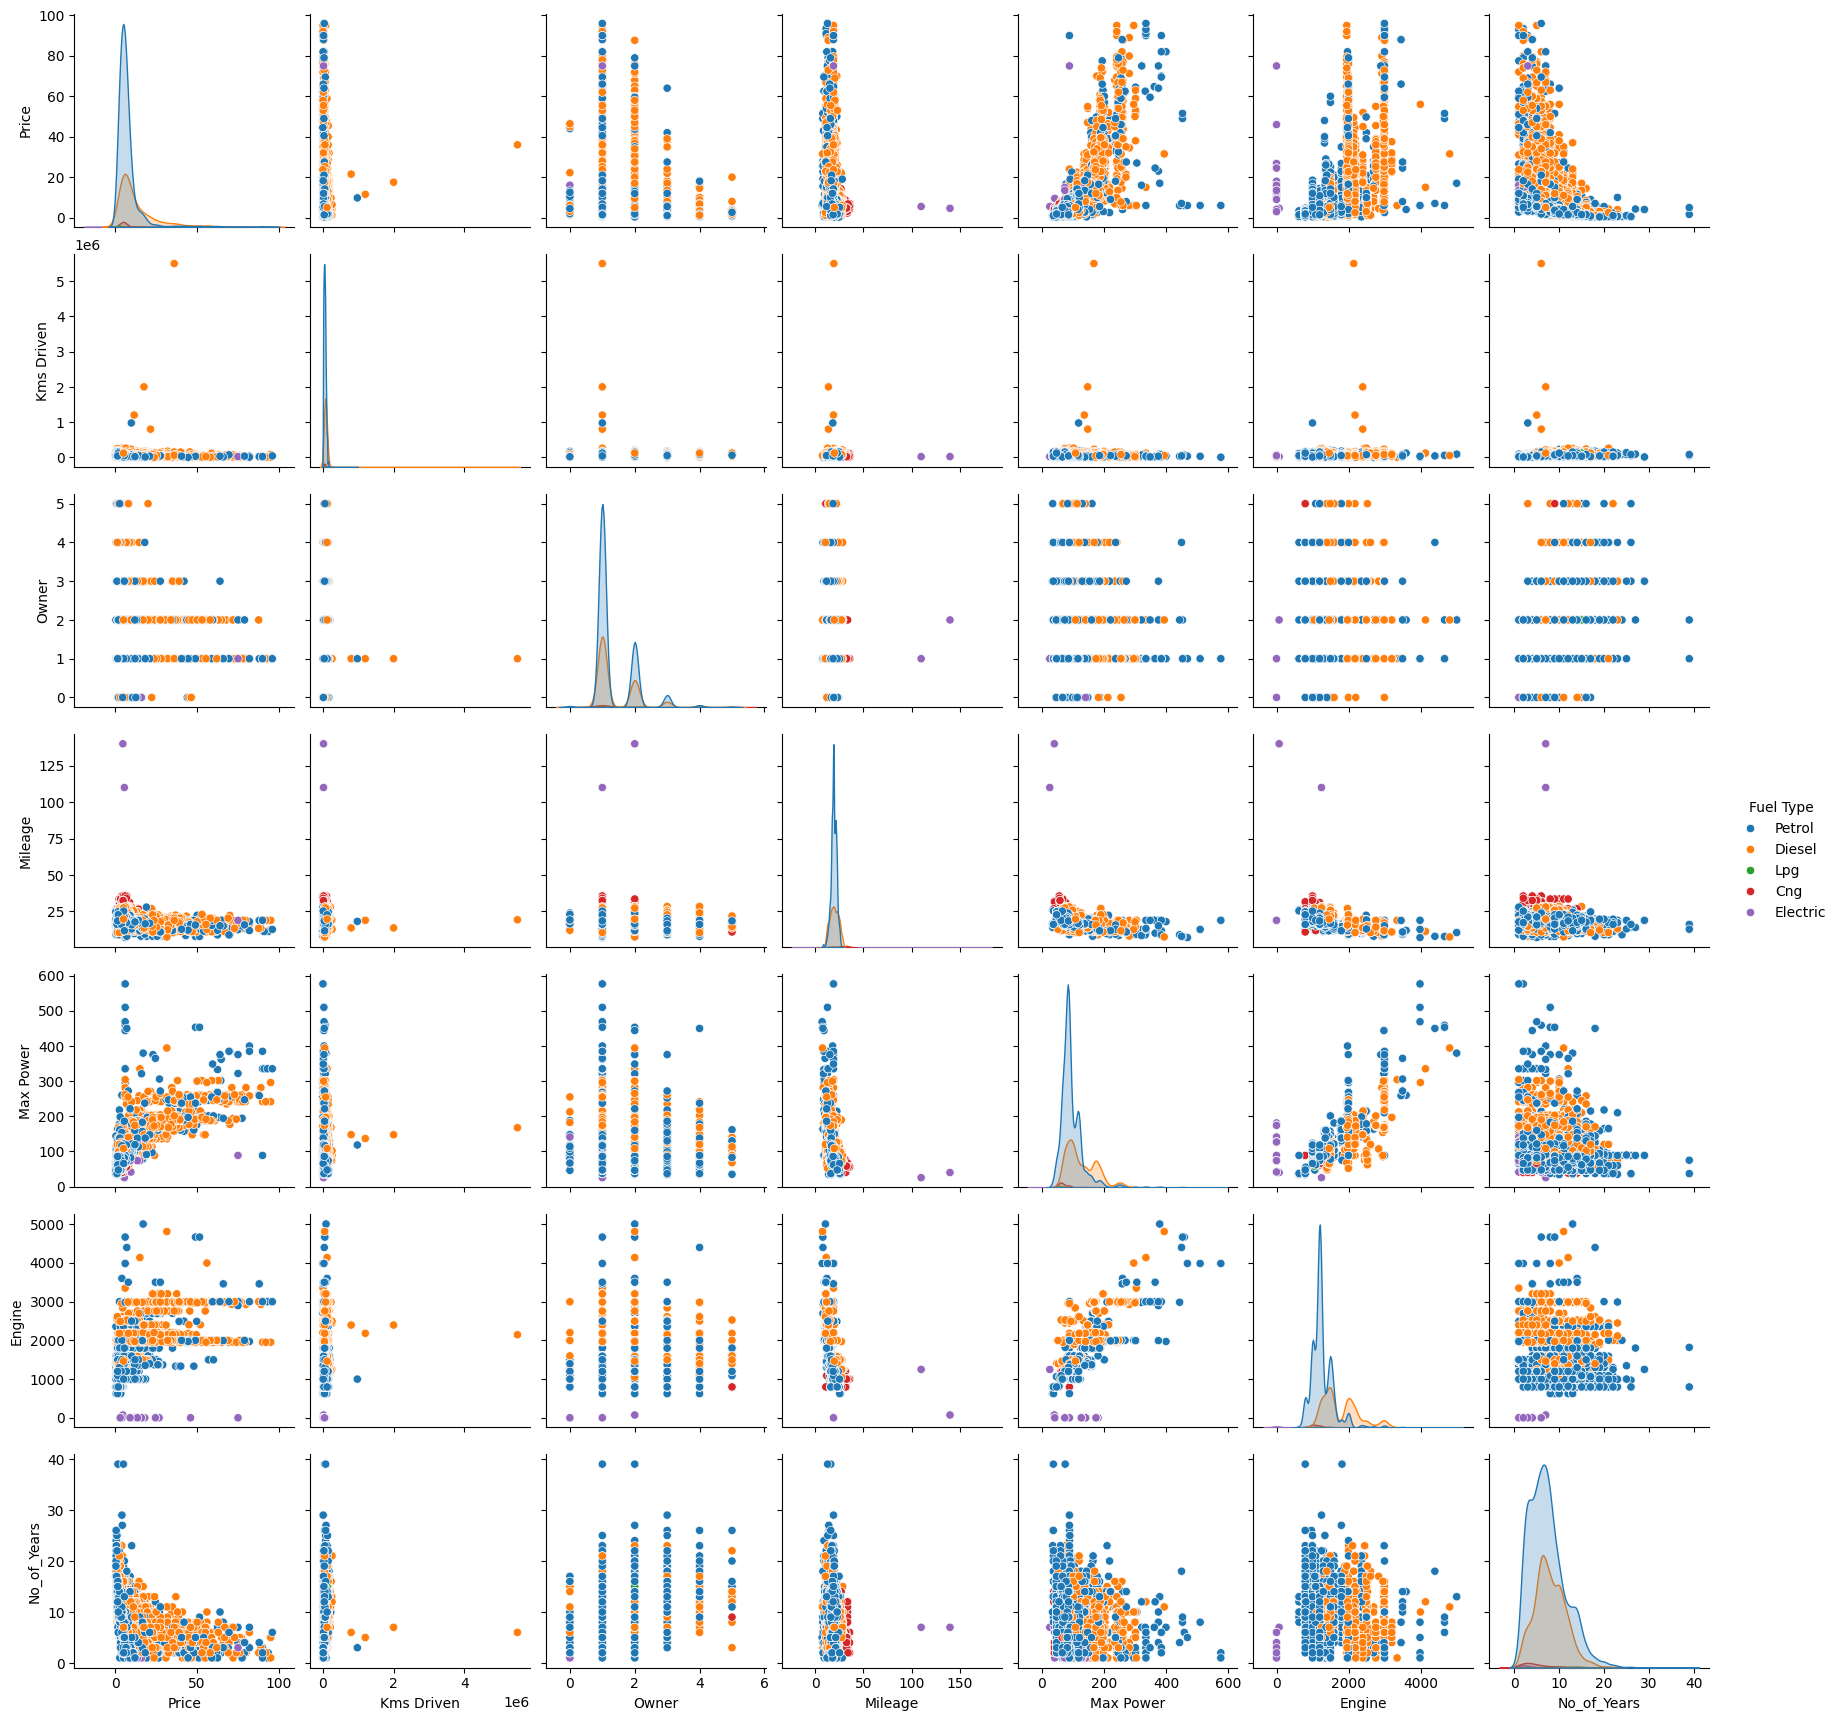

In [22]:
sns.pairplot(data= final_df, hue= 'Fuel Type', diag_kind= 'kde')

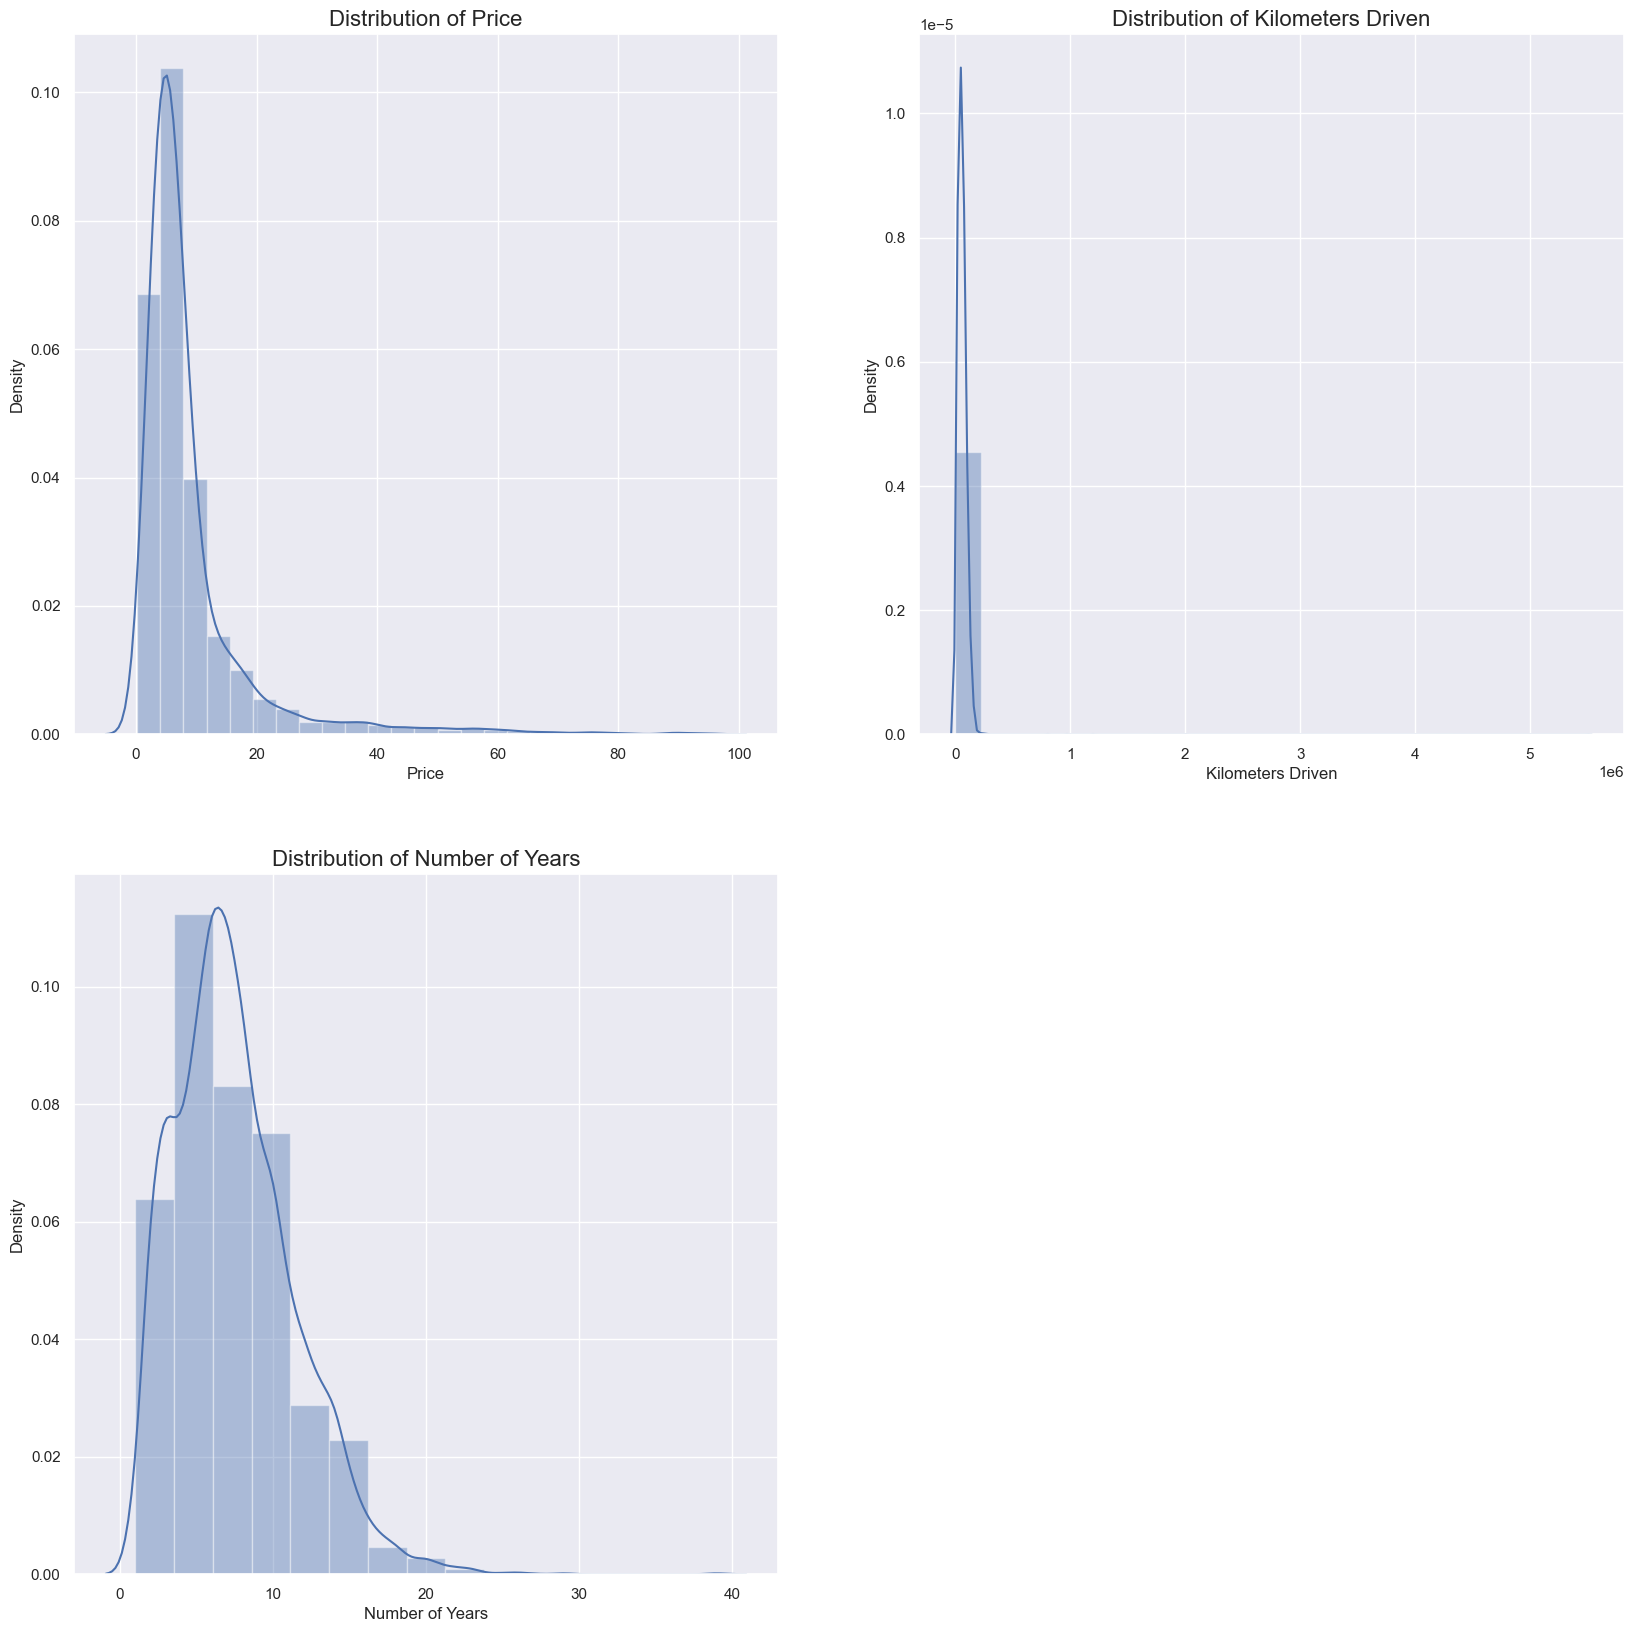

In [23]:
# Let's see the distribution of the two variable from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)

# Subplot 1: Distplot of 'Selling_Price' feature
k1 = sns.distplot(a = final_df['Price'], bins= 25, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Price', fontsize=16)
ax0.set(xlabel= 'Price', ylabel= 'Density')

# Subplot 2: Distplot of 'Kms Driven' feature
k1 = sns.distplot(a = final_df['Kms Driven'], bins= 25, ax=ax1) # add to subplot 2
ax1.set_title('Distribution of Kilometers Driven', fontsize=16)
ax1.set(xlabel= 'Kilometers Driven', ylabel= 'Density')

# Subplot 3: Distplot of 'No_of_Years' feature
k1 = sns.distplot(a = final_df['No_of_Years'], bins= 15, ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Number of Years', fontsize=16)
ax2.set(xlabel= 'Number of Years', ylabel= 'Density')

plt.show()
#fig.savefig("Distributionplot.png")

In [24]:
print("'No_of_Years' variable have {} unique category : {}".format(final_df['No_of_Years'].nunique(), 
                                                                   final_df['No_of_Years'].unique()))

'No_of_Years' variable have 29 unique category : [ 9  6 10  4  7  3  5  2  8 13 15 11 14 16 18 12 19 17  1 29 26 20 21 23
 22 24 39 27 25]


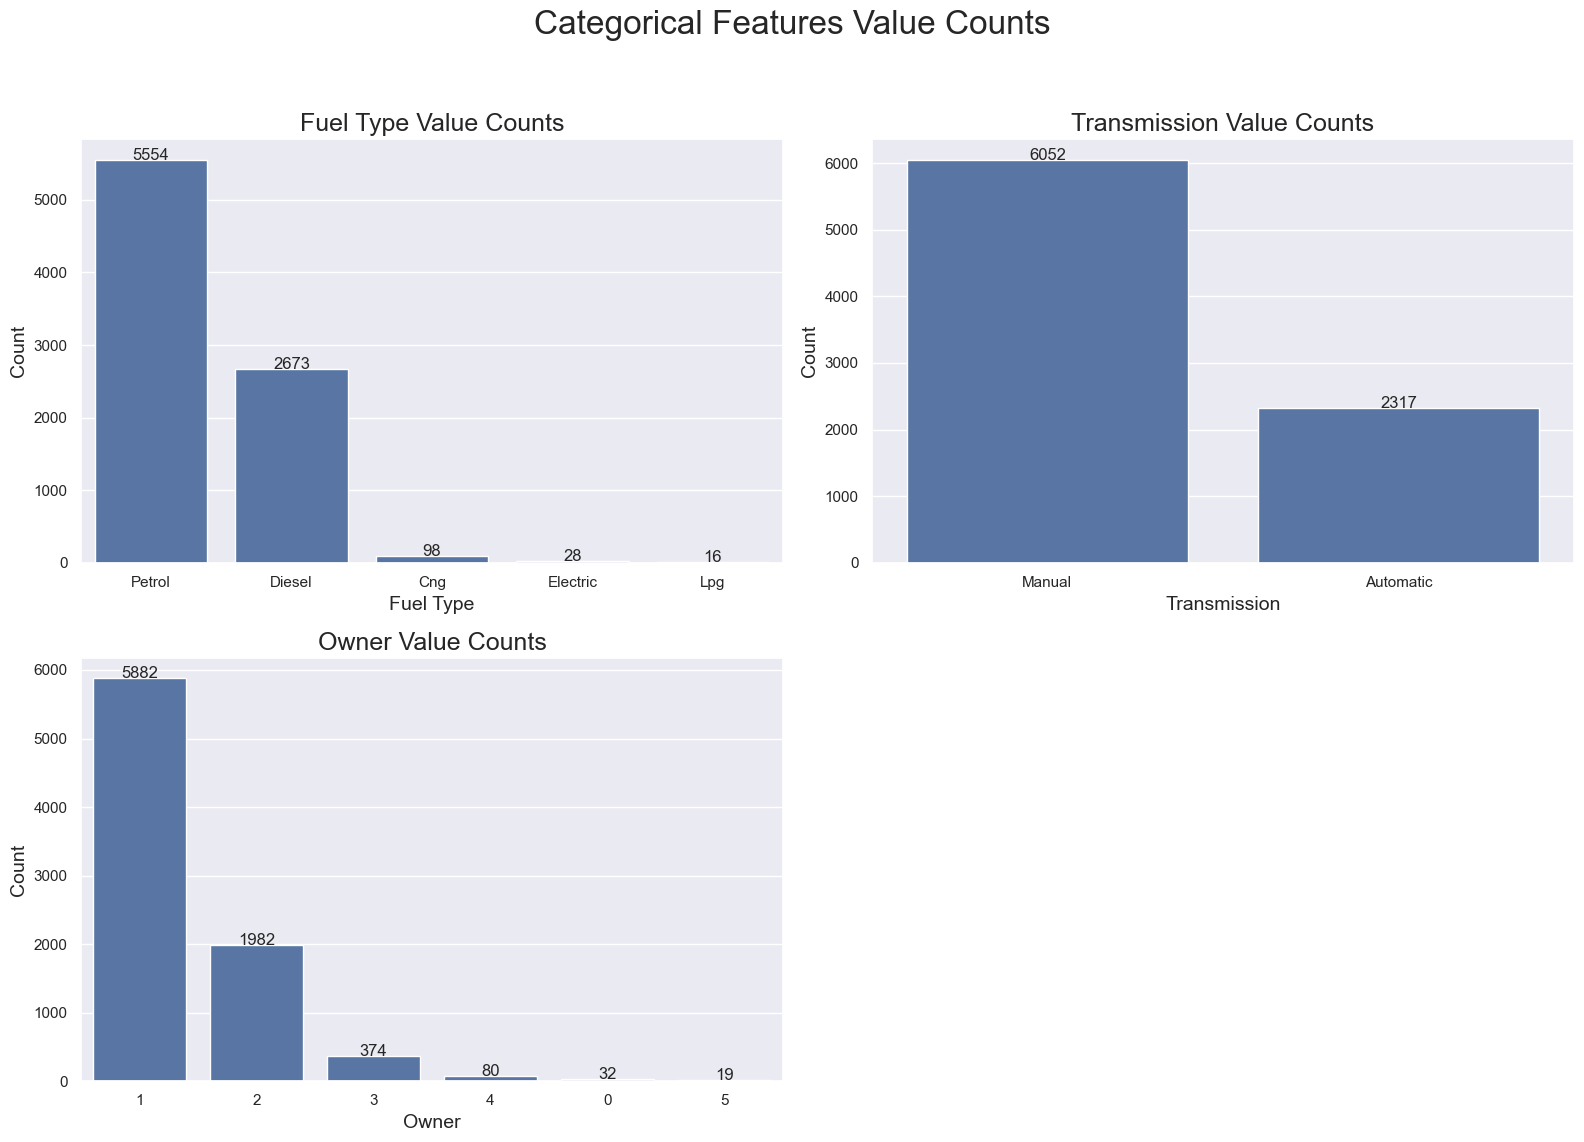

In [25]:
# Now, define the list of categorical columns correctly
cat_col = ['Fuel Type', 'Transmission', 'Owner']

# Dynamically determine the number of plots based on the length of cat_col
num_plots = len(cat_col)
rows = (num_plots // 2) + (num_plots % 2)  # Calculate rows for grid layout

# Create a figure and set its size
fig = plt.figure(figsize=(16, rows * 6))  # Adjust figure size based on the number of rows
plt.suptitle('Categorical Features Value Counts', fontsize=24)

for i, col in enumerate(cat_col, start=1):
    ax = fig.add_subplot(rows, 2, i)  # Dynamically adjust grid size
    cat_order = final_df[col].value_counts()  # Get value counts for each category
    sns.countplot(data=final_df, x=col, order=cat_order.index, ax=ax)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f'{col} Value Counts', fontsize=18)
    
    # Add text labels above the bars
    for index, value in enumerate(cat_order):
        ax.text(index, value + 0.1, str(value), ha='center', fontsize=12)

# Adjust layout to ensure the title fits and the plots are neatly arranged
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

Text(0.5, 1.0, 'Number of Years Value Counts')

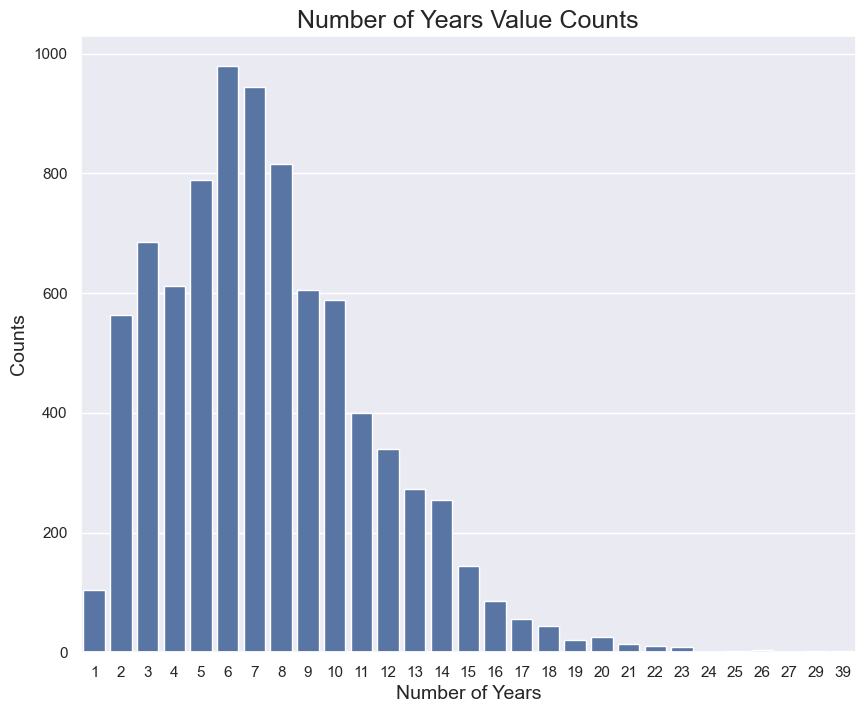

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(data= final_df, x= 'No_of_Years')
plt.xlabel('Number of Years', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Number of Years Value Counts', fontsize=18)

**Convert Categorical variable into numerical**

In [27]:
final_df = pd.get_dummies(final_df, drop_first=True)

# Convert only boolean columns to 0 and 1
boolean_columns = final_df.select_dtypes(include='bool').columns
final_df[boolean_columns] = final_df[boolean_columns].astype(int)

# Display the updated DataFrame
final_df.head()

,Price,Kms Driven,Owner,Mileage,Max Power,Engine,No_of_Years,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Lpg,Fuel Type_Petrol,Transmission_Manual
0,4.00,120000.0,3,23.10,67.04,998.0,9,0,0,0,1,1
1,8.11,32706.0,2,17.00,121.31,1497.0,6,0,0,0,1,1
2,5.85,11949.0,1,23.84,84.00,1199.0,6,0,0,0,1,1
3,4.62,17794.0,1,19.10,81.86,1197.0,10,0,0,0,1,1
4,7.90,60000.0,1,23.65,88.50,1248.0,9,1,0,0,0,1


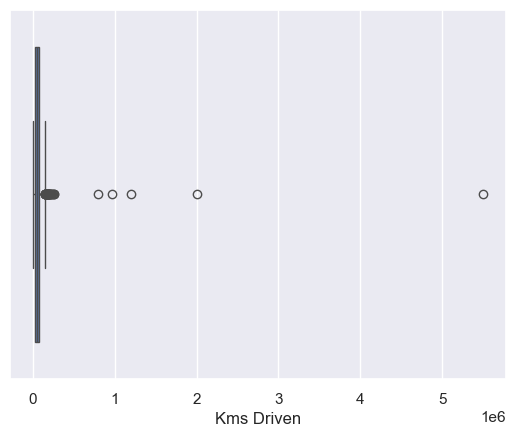

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for Kms Driven
sns.boxplot(x='Kms Driven', data=df)
plt.show()

In [29]:
# Calculate IQR
Q1 = df['Kms Driven'].quantile(0.25)
Q3 = df['Kms Driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['Kms Driven'] >= lower_bound) & (df['Kms Driven'] <= upper_bound)]

# Compare changes
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_no_outliers)}")


Original number of rows: 8369
Number of rows after removing outliers: 8321


In [30]:
import numpy as np

# Define a threshold
threshold = 3

# Select columns to check for outliers
columns_to_check = ['Price', 'Kms Driven']

# Calculate Z-scores
for col in columns_to_check:
    mean = df[col].mean()
    std = df[col].std()
    z_scores = (df[col] - mean) / std
    df = df[np.abs(z_scores) < threshold]  # Keep only rows where Z-score < threshold

print("Data after removing outliers using Z-score:")
print(df.shape)

Data after removing outliers using Z-score:
(8137, 14)


Rows removed: 733


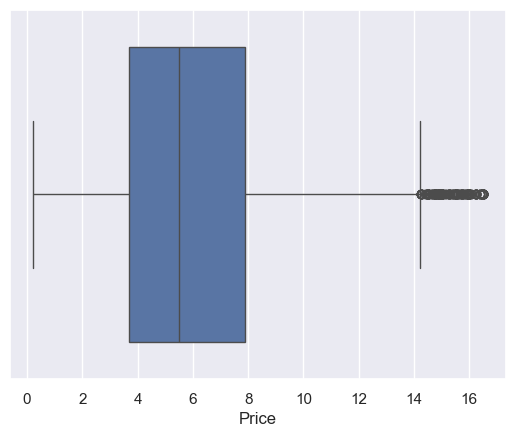

In [31]:
import pandas as pd

# Assuming df is your DataFrame and 'Price' is the target column
Q1 = df['Price'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['Price'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

# Defining lower and upper bounds for acceptable values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
df_filtered = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Optionally, you can print out the number of removed rows
print(f"Rows removed: {df.shape[0] - df_filtered.shape[0]}")

# Plot the boxplot again to check the result
sns.boxplot(x=df_filtered['Price'])
plt.show()

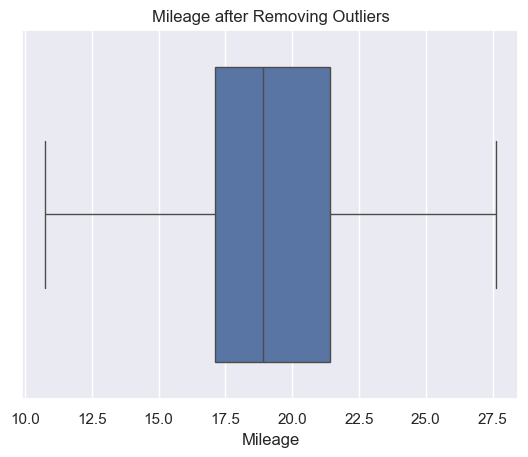

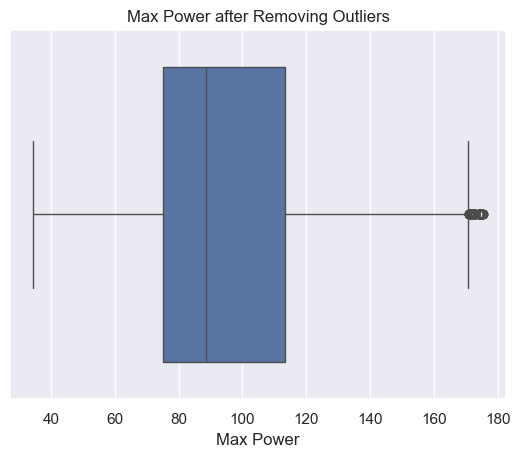

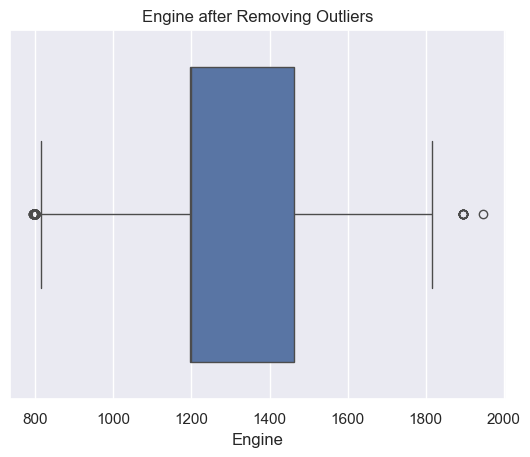

Total rows removed: 1439


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Handling outliers for Mileage
Q1_mileage = df['Mileage'].quantile(0.25)  # First quartile (25th percentile)
Q3_mileage = df['Mileage'].quantile(0.75)  # Third quartile (75th percentile)
IQR_mileage = Q3_mileage - Q1_mileage  # Interquartile Range

# Defining lower and upper bounds for acceptable values
lower_bound_mileage = Q1_mileage - 1.5 * IQR_mileage
upper_bound_mileage = Q3_mileage + 1.5 * IQR_mileage

# Filter the data to remove outliers for Mileage
df_filtered = df[(df['Mileage'] >= lower_bound_mileage) & (df['Mileage'] <= upper_bound_mileage)]

# Plot the boxplot again to check the result
sns.boxplot(x=df_filtered['Mileage'])
plt.title('Mileage after Removing Outliers')
plt.show()

# Handling outliers for Max Power
Q1_power = df['Max Power'].quantile(0.25)  # First quartile (25th percentile)
Q3_power = df['Max Power'].quantile(0.75)  # Third quartile (75th percentile)
IQR_power = Q3_power - Q1_power  # Interquartile Range

# Defining lower and upper bounds for acceptable values
lower_bound_power = Q1_power - 1.5 * IQR_power
upper_bound_power = Q3_power + 1.5 * IQR_power

# Filter the data to remove outliers for Max Power
df_filtered = df_filtered[(df_filtered['Max Power'] >= lower_bound_power) & (df_filtered['Max Power'] <= upper_bound_power)]

# Plot the boxplot again to check the result
sns.boxplot(x=df_filtered['Max Power'])
plt.title('Max Power after Removing Outliers')
plt.show()

# Handling outliers for Engine
Q1_engine = df['Engine'].quantile(0.25)  # First quartile (25th percentile)
Q3_engine = df['Engine'].quantile(0.75)  # Third quartile (75th percentile)
IQR_engine = Q3_engine - Q1_engine  # Interquartile Range

# Defining lower and upper bounds for acceptable values
lower_bound_engine = Q1_engine - 1.5 * IQR_engine
upper_bound_engine = Q3_engine + 1.5 * IQR_engine

# Filter the data to remove outliers for Engine
df_filtered = df_filtered[(df_filtered['Engine'] >= lower_bound_engine) & (df_filtered['Engine'] <= upper_bound_engine)]

# Plot the boxplot again to check the result
sns.boxplot(x=df_filtered['Engine'])
plt.title('Engine after Removing Outliers')
plt.show()

# Optionally, you can print the total number of rows removed
print(f"Total rows removed: {df.shape[0] - df_filtered.shape[0]}")


<Axes: >

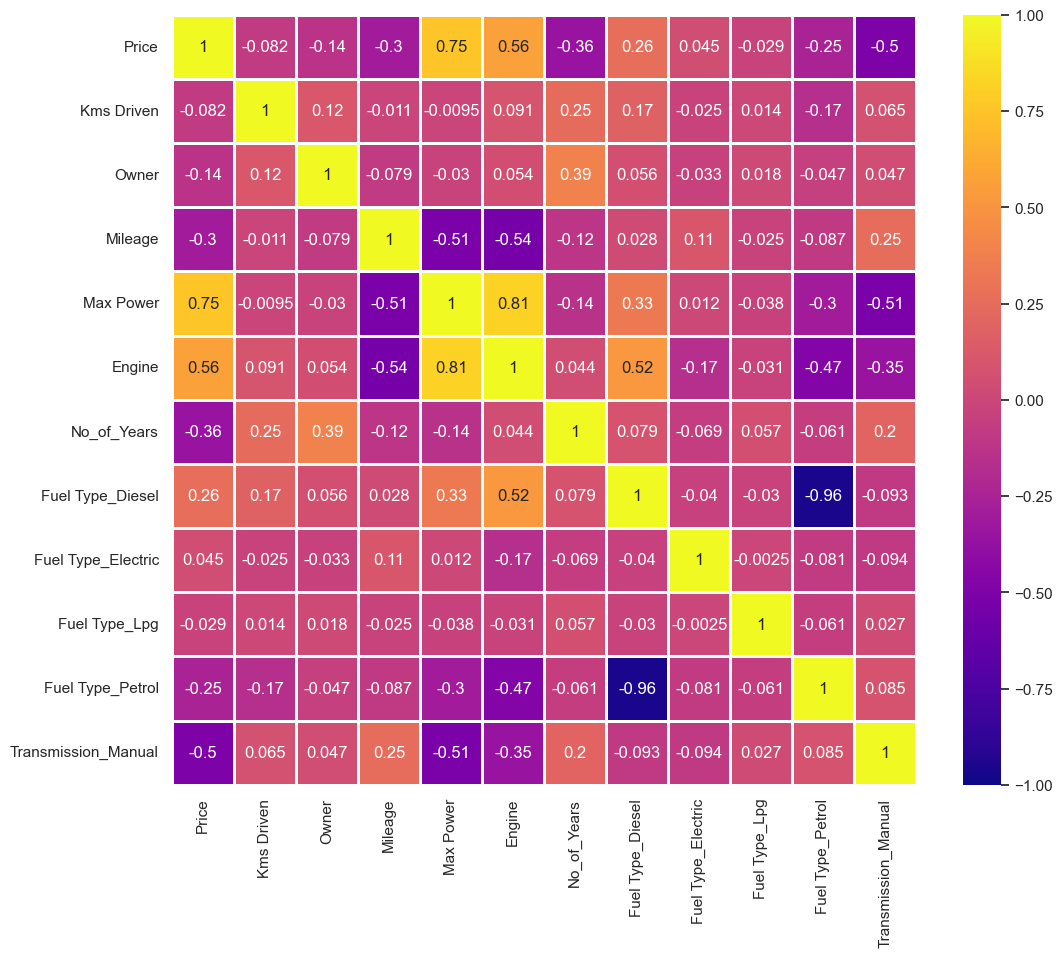

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(data = final_df.corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)

In [34]:
# Let's check data types of variables
final_df.dtypes

Price                  float64
Kms Driven             float64
Owner                    int64
Mileage                float64
Max Power              float64
Engine                 float64
No_of_Years              int64
Fuel Type_Diesel         int64
Fuel Type_Electric       int64
Fuel Type_Lpg            int64
Fuel Type_Petrol         int64
Transmission_Manual      int64
dtype: object

In [35]:
X = final_df.iloc[:, 1:]            # Feature matrix (independent variables)
y = final_df.iloc[:, 0]             # Target variable (dependent variable)

In [36]:
# To check important feature
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [37]:
print(model.feature_importances_)

[3.72629374e-02 1.02639294e-02 4.41462545e-02 4.16848032e-01
 1.16086244e-01 1.55798241e-01 2.90307581e-02 1.19959967e-03
 2.31158881e-06 7.93244254e-03 1.81429249e-01]


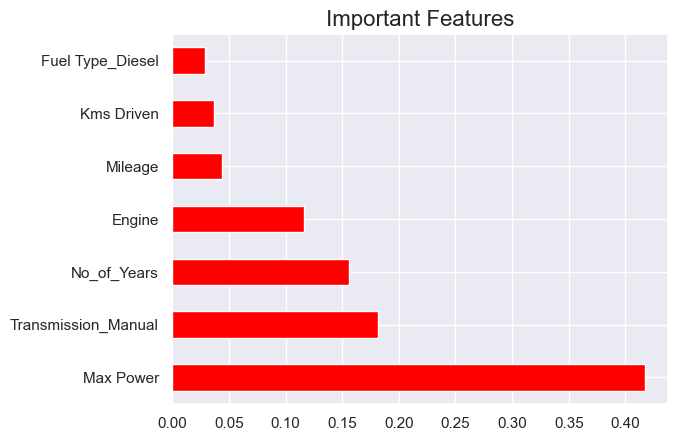

In [38]:
#plot graph of feature importances for better visualization

imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**MODEL BUILDING**

**Regularization**

In [40]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = ['Fuel Type', 'Transmission']

# One-hot encode the categorical columns
encoded_df = pd.get_dummies(df_filtered, columns=categorical_cols, drop_first=True)

# Check the new DataFrame
print(encoded_df.head())


        City Original Equipment Manufacturer                 Car  Year  Price  \
0  Bangalore                          Maruti      Maruti Celerio  2015   4.00   
1  Bangalore                            Ford       Ford Ecosport  2018   8.11   
2  Bangalore                            Tata          Tata Tiago  2018   5.85   
3  Bangalore                         Hyundai       Hyundai Xcent  2014   4.62   
4  Bangalore                          Maruti  Maruti SX4 S Cross  2015   7.90   

   Kms Driven  Owner  Mileage  Max Power  Engine  Current Year  No_of_Years  \
0    120000.0      3    23.10      67.04   998.0          2024            9   
1     32706.0      2    17.00     121.31  1497.0          2024            6   
2     11949.0      1    23.84      84.00  1199.0          2024            6   
3     17794.0      1    19.10      81.86  1197.0          2024           10   
4     60000.0      1    23.65      88.50  1248.0          2024            9   

   Fuel Type_Diesel  Fuel Type_Lpg  Fu

In [42]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features (X) and target (y)
X = encoded_df.drop(['Price', 'Car', 'Original Equipment Manufacturer', 'City'], axis=1)  # Drop target variable
y = encoded_df['Price']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso.fit(X_train, y_train)

# Predictions and performance for Lasso
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)
train_rmse_lasso = mean_squared_error(y_train, y_train_pred_lasso, squared=False)
test_rmse_lasso = mean_squared_error(y_test, y_test_pred_lasso, squared=False)

# Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=0.1)  # alpha is the regularization strength
ridge.fit(X_train, y_train)

# Predictions and performance for Ridge
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
train_rmse_ridge = mean_squared_error(y_train, y_train_pred_ridge, squared=False)
test_rmse_ridge = mean_squared_error(y_test, y_test_pred_ridge, squared=False)

# Output the results
print("Lasso Regression:")
print(f"Training R² Score: {train_r2_lasso}")
print(f"Testing R² Score: {test_r2_lasso}")
print(f"Training RMSE: {train_rmse_lasso}")
print(f"Testing RMSE: {test_rmse_lasso}")

print("\nRidge Regression:")
print(f"Training R² Score: {train_r2_ridge}")
print(f"Testing R² Score: {test_r2_ridge}")
print(f"Training RMSE: {train_rmse_ridge}")
print(f"Testing RMSE: {test_rmse_ridge}")


Lasso Regression:
Training R² Score: 0.7184850417285207
Testing R² Score: 0.7543477073924247
Training RMSE: 1.9232959662409144
Testing RMSE: 1.7943494793658903

Ridge Regression:
Training R² Score: 0.7374363226327634
Testing R² Score: 0.771836371127216
Training RMSE: 1.8574310700783443
Testing RMSE: 1.729297963221011


In [43]:
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))

In [44]:
# create a new DataFrame from the above three lists
MLModels_df = pd.DataFrame({"Models": [ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Ridge', 'Lasso'],
                           "Mean Squared Error": mse,
                           "Root Mean Squared Error": rmse,
                           "Explained Variance Score": evs,
                           "R-Square Score / Accuracy": r_square_score})

MLModels_df.set_index('Models', inplace=True)
MLModels_df.head()

,Mean Squared Error,Root Mean Squared Error,Explained Variance Score,R-Square Score / Accuracy
Models,,,,
Linear Regression,2.990470,1.729297,0.771842,0.771837
Support Vector Rregression,11.277716,3.358231,0.153814,0.139545
Decision Tree Regressor,1.849818,1.360080,0.858952,0.858865
Random Forest Regressor,1.141689,1.068499,0.912935,0.912893
Ridge,2.990488,1.729303,0.771840,0.771835


In [45]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_rf_model = grid_search.best_estimator_

# Train the best model
best_rf_model.fit(X_train, y_train)

# Predict the target values using the trained model
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Evaluate the model performance on the training data
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Evaluate the model performance on the testing data
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Print the evaluation metrics
print(f"Training R² Score: {train_r2:.4f}, Training RMSE: {train_rmse:.4f}")
print(f"Testing R² Score: {test_r2:.4f}, Testing RMSE: {test_rmse:.4f}")

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training R² Score: 0.9833, Training RMSE: 0.4684
Testing R² Score: 0.9073, Testing RMSE: 1.1021


In [46]:
y_predictions = best_rf_model.predict(X_test)
y_predictions

array([6.86642479, 0.9881    , 3.0313225 , ..., 3.06450625, 1.88924107,
       4.44135   ])

**Predicting Test Data by visualizing**

Text(0.5, 1.0, 'True value Vs Predicted values of Price')

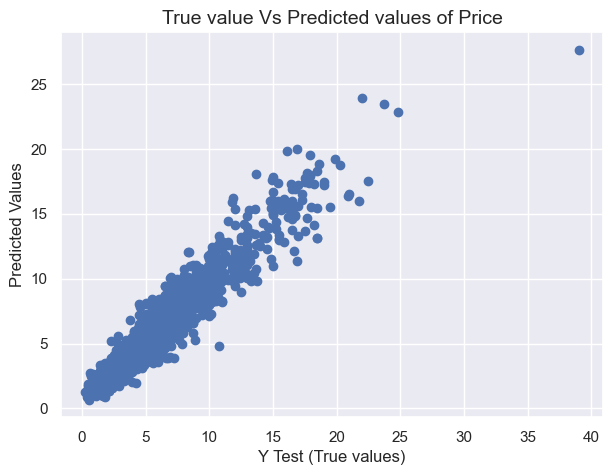

In [47]:
plt.figure(figsize=(7,5))
plt.scatter(x= y_test, y= y_predictions)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted Values')
plt.title('True value Vs Predicted values of Price', fontsize=14)

**Residuals**

<Axes: xlabel='Price', ylabel='Density'>

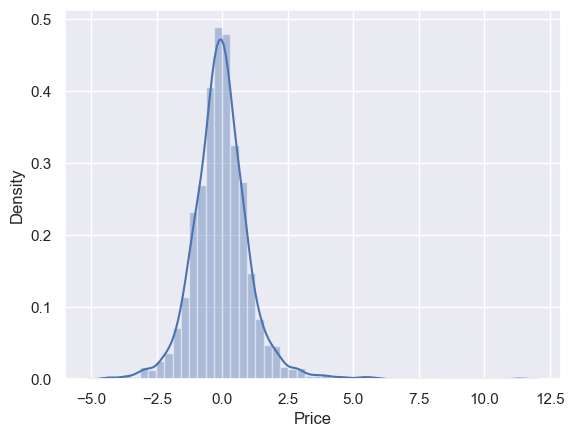

In [48]:
sns.distplot(y_test - y_predictions)

**Model Evaluation**

In [49]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predictions))
print('Mean Squareed Error: ', mean_squared_error(y_test, y_predictions))
print('Root Mean Square Error: ', np.sqrt(mean_squared_error(y_test, y_predictions)))
print('\nExplaned Variance Score: ', explained_variance_score(y_true= y_test, y_pred= y_predictions))

Mean Absolute Error:  0.7770313828798493
Mean Squareed Error:  1.2146391696210483
Root Mean Square Error:  1.1021066961147856

Explaned Variance Score:  0.9074239337068166


In [50]:
print('Accuracy: ', r2_score(y_test, y_predictions))

Accuracy:  0.9073268259693654


**Generate the pickle file**

In [51]:
import pickle

# open the file where you want to store
file = open('rf_regression_model.pkl', 'wb')

# dump information on that file
pickle.dump(best_rf_model, file)